In [43]:
import zlib
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
from IPython.display import clear_output
from itertools import compress
from tqdm import tqdm

In [42]:
s = bytes(''.join([np.random.choice(["A","C","G","T"]) for e in range(1,100)]), 'utf-8')
len(zlib.compress(s))/len(s)

0.5858585858585859

In [37]:
s = bytes(''.join([np.random.choice(["A"]) for e in range(1,100)]), 'utf-8')
len(zlib.compress(s))/len(s)

0.12121212121212122

In [36]:
s = bytes(''.join([np.random.choice(["AA","CC","GG","TT"]) for e in range(1,50)]), 'utf-8')
len(zlib.compress(s))/len(s)

0.5306122448979592

In [157]:
directory = "/Users/christopher/Desktop/A2"
#make test file
end_reads = 10000
filename = directory+"/EJ_zebrafish_library_A2_S3074_L002_R1_001.fastq"
i = 0
sequences = []
for record in SeqIO.parse(filename, "fastq"):
    if i >= end_reads:
        break
    sequences.append(record)
    i = i + 1
with open(directory+"/test_r1.fastq", "w") as output_handle:
    SeqIO.write(sequences, output_handle, "fastq")

In [158]:
filename = directory+"/EJ_zebrafish_library_A2_S3074_L002_R2_001.fastq"
i = 0
sequences = []
for record in SeqIO.parse(filename, "fastq"):
    if i >= end_reads:
        break
    sequences.append(record)
    i = i + 1
with open(directory+"/test_r2.fastq", "w") as output_handle:
    SeqIO.write(sequences, output_handle, "fastq")

In [283]:
low_bound = .9
hi_bound = 0.95

In [284]:
compute_up_to = 30
quality_mat1 = np.zeros((100,end_reads))

complexities1 = np.zeros(end_reads)
gc_frac1 = np.zeros(end_reads)
low_complexity = []
hi_complexity = []
i = 0
for record in SeqIO.parse(directory+"/test_r1.fastq", "fastq"):
    s = bytes(str(record.seq)[:compute_up_to], 'utf-8')
    quality_mat1[:,i] = record.letter_annotations["phred_quality"]
    complexities1[i] = len(zlib.compress(s))/len(s)
    if complexities1[i] < hi_bound:
        low_complexity.append(i)
    if complexities1[i] > hi_bound:
        hi_complexity.append(i)
    gc_frac1[i] = (str(record.seq)[:compute_up_to].count('G') + str(record.seq)[:compute_up_to].count('C'))/len(record.seq)
    i = i + 1
    

In [285]:
compute_up_to = 30
quality_mat2 = np.zeros((100,end_reads))

complexities2 = np.zeros(end_reads)
gc_frac2 = np.zeros(end_reads)
low_complexity = []
hi_complexity = []
mid_complexity = []
i = 0
for record in SeqIO.parse(directory+"/test_r2.fastq", "fastq"):
    s = bytes(str(record.seq)[:compute_up_to], 'utf-8')
    quality_mat2[:,i] = record.letter_annotations["phred_quality"]
    complexities2[i] = len(zlib.compress(s))/len(s)
    if complexities2[i] < low_bound:
        low_complexity.append(record)
    if (complexities2[i] > low_bound) & (complexities2[i] < hi_bound):
        mid_complexity.append(record)
    if complexities2[i] > hi_bound:
        hi_complexity.append(record)
    gc_frac2[i] = (str(record.seq)[:compute_up_to].count('G') + str(record.seq)[:compute_up_to].count('C'))/len(record.seq)
    i = i + 1
    

In [293]:
mid_complexity[80]

SeqRecord(seq=Seq('GCATGTATATACAGTAAAAGAGACAGTACAAATGTACGGCTGAGACTGAGAGAT...TGC'), id='A01679:75:HMTV5DSX5:2:1101:17933:10567', name='A01679:75:HMTV5DSX5:2:1101:17933:10567', description='A01679:75:HMTV5DSX5:2:1101:17933:10567 2:N:0:CGATTAGTCTGG+GTCCTAATCCTG', dbxrefs=[])

In [294]:
s = bytes(str(mid_complexity[25].seq)[:compute_up_to], 'utf-8')
len(zlib.compress(s))/len(s)

0.9333333333333333

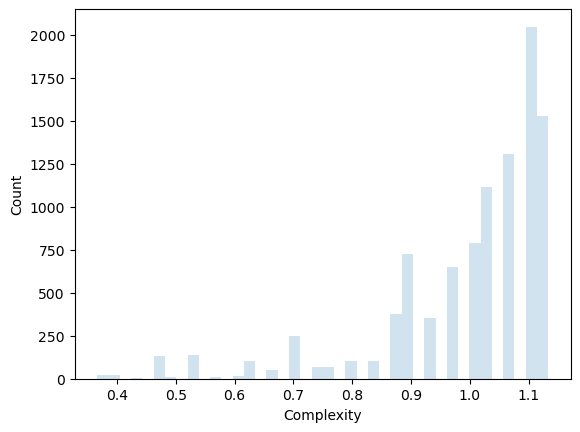

In [297]:
plt.hist(complexities1,40,alpha=0.2,label = "read_1")
plt.ylabel('Count')
plt.xlabel('Complexity')
plt.show()

In [299]:
np.unique(complexities1)

array([0.36666667, 0.4       , 0.43333333, 0.46666667, 0.5       ,
       0.53333333, 0.56666667, 0.6       , 0.63333333, 0.66666667,
       0.7       , 0.73333333, 0.76666667, 0.8       , 0.83333333,
       0.86666667, 0.9       , 0.93333333, 0.96666667, 1.        ,
       1.03333333, 1.06666667, 1.1       , 1.13333333])

Text(0.5, 0, 'GC Fraction')

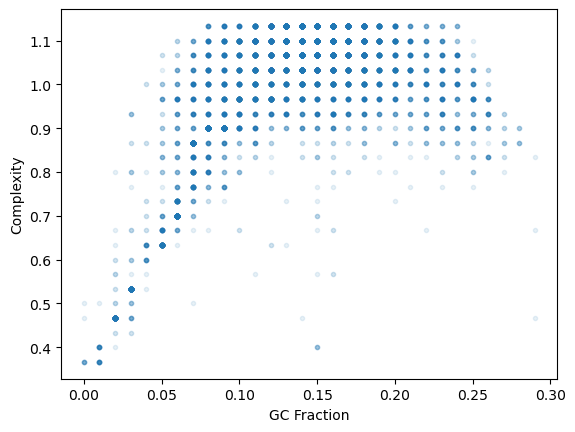

In [165]:
plt.scatter(gc_frac1, complexities1, alpha = 0.1,marker = '.')
plt.ylabel('Complexity')
plt.xlabel('GC Fraction')

Text(0, 0.5, 'Read 2')

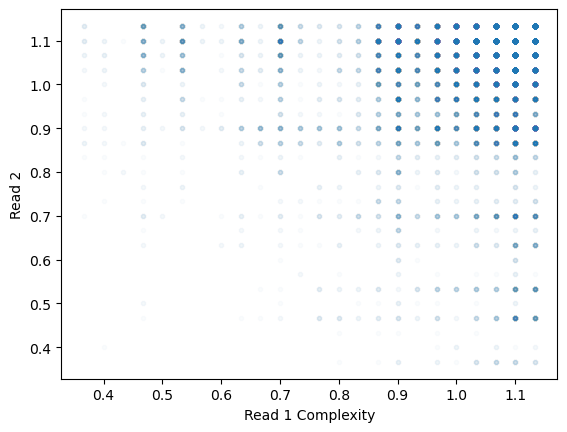

In [171]:
plt.scatter(complexities1, complexities2, alpha = 0.02,marker = '.')
plt.xlabel('Read 1 Complexity')
plt.ylabel('Read 2')

In [180]:
j = 301
print(low_complexity[j])

ID: A01679:75:HMTV5DSX5:2:1101:3631:4836
Name: A01679:75:HMTV5DSX5:2:1101:3631:4836
Description: A01679:75:HMTV5DSX5:2:1101:3631:4836 2:N:0:CGATTAGTCTGG+GTCCTAATCCTG
Number of features: 0
Per letter annotation for: phred_quality
Seq('ACGCAGAGTACTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTAAAA...AAC')


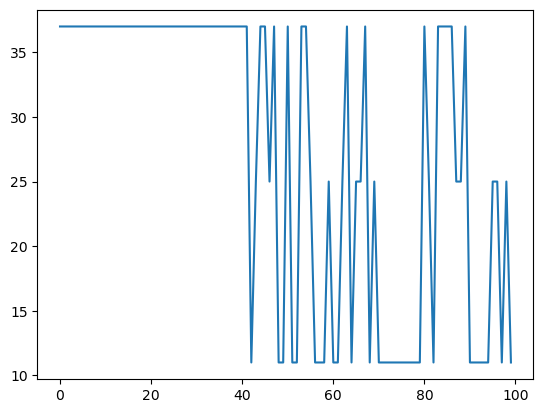

In [181]:
plt.plot(low_complexity[j].letter_annotations["phred_quality"])

Text(0.5, 0, 'Cycle Count')

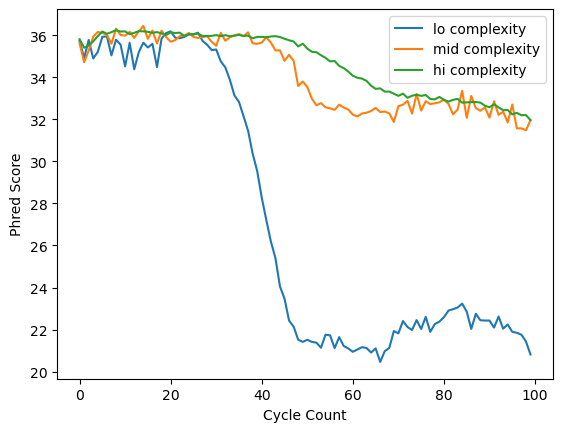

In [251]:
low_bound = .9
hi_bound = 0.95
plt.plot(np.mean(quality_mat1[:,complexities1 < low_bound],axis = 1),label = "lo complexity")
plt.plot(np.mean(quality_mat1[:,(complexities1 > low_bound) & (complexities1 < hi_bound)],axis = 1),label = "mid complexity")

plt.plot(np.mean(quality_mat1[:,complexities1 > hi_bound],axis = 1),label = "hi complexity")
plt.legend()
plt.ylabel('Phred Score')
plt.xlabel('Cycle Count')

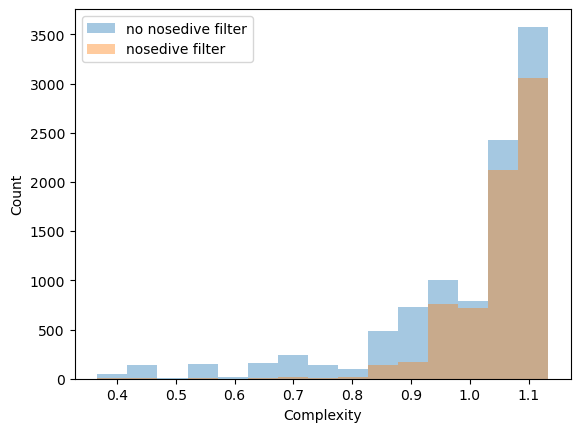

In [267]:
plt.hist(complexities1,15,alpha = 0.4,label = "no nosedive filter")
mask = np.mean(quality_mat1[35:,:],axis = 0) > 28
plt.hist(complexities1[mask],15,alpha = 0.4,label = "nosedive filter")
plt.legend()
plt.xlabel('Complexity')
plt.ylabel('Count')
plt.show()

In [300]:
np.unique(complexities1[mask])

array([0.36666667, 0.4       , 0.46666667, 0.5       , 0.56666667,
       0.6       , 0.63333333, 0.66666667, 0.7       , 0.73333333,
       0.76666667, 0.8       , 0.83333333, 0.86666667, 0.9       ,
       0.93333333, 0.96666667, 1.        , 1.03333333, 1.06666667,
       1.1       , 1.13333333])

In [302]:
to_include = (np.mean(quality_mat1[35:,:],axis = 0) > 28) & (np.mean(quality_mat2[35:,:],axis = 0) > 28) 
rejects = ~to_include

In [305]:
filename = directory+"/test_r1.fastq"
i = 0
sequences_to_include_r1 = []
rejected_r1 = []
for record in SeqIO.parse(filename, "fastq"):
    if to_include[i]:
        sequences_to_include_r1.append(record)
    else:
        rejected_r1.append(record)
    i = i + 1
with open(directory+"/test_r1_included.fastq", "w") as output_handle:
    SeqIO.write(sequences_to_include_r1, output_handle, "fastq")
with open(directory+"/test_r1_rejected.fastq", "w") as output_handle:
    SeqIO.write(rejected_r1, output_handle, "fastq")

In [306]:
filename = directory+"/test_r2.fastq"
i = 0
sequences_to_include_r2 = []
rejected_r2 = []
for record in SeqIO.parse(filename, "fastq"):
    if to_include[i]:
        sequences_to_include_r2.append(record)
    else:
        rejected_r2.append(record)
    i = i + 1
with open(directory+"/test_r2_included.fastq", "w") as output_handle:
    SeqIO.write(sequences_to_include_r2, output_handle, "fastq")
with open(directory+"/test_r2_rejected.fastq", "w") as output_handle:
    SeqIO.write(rejected_r2, output_handle, "fastq")

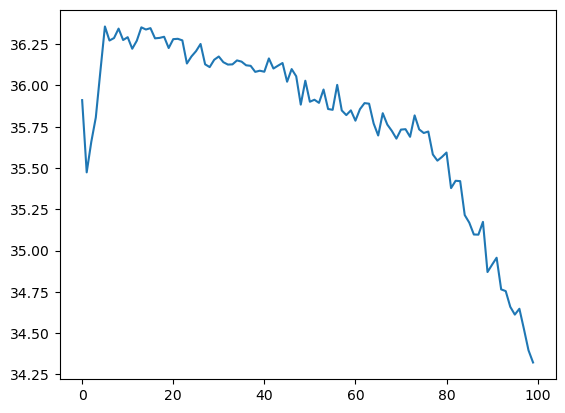

In [272]:
plt.plot(np.mean(quality_mat1[:,to_include],axis = 1))

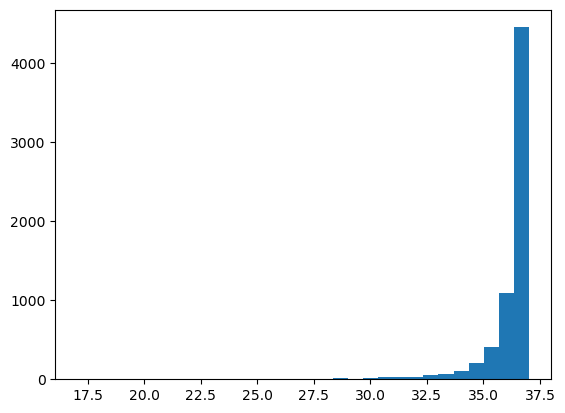

In [275]:
plt.hist(np.mean(quality_mat2[:35,to_include],axis = 0),30)
plt.show()